In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('chicag daily.csv')

In [3]:
data.shape

(3773, 2)

In [4]:
data.head()

daily    f0_
0  2013-01-01  56953
1  2013-01-02  36830
2  2013-01-03  38808
3  2013-01-04  50391
4  2013-01-05  48352

In [5]:
data.tail()

daily    f0_
3768  2023-04-27  23188
3769  2023-04-28  22088
3770  2023-04-29  16106
3771  2023-04-30  16228
3772  2023-05-01     44

In [24]:
data.rename(columns = {'f0_':'Trips'}, inplace = True)

In [7]:
data.rename(columns = {'daily':'Date'}, inplace = True)

In [8]:
data.head()

Date    f0_
0  2013-01-01  56953
1  2013-01-02  36830
2  2013-01-03  38808
3  2013-01-04  50391
4  2013-01-05  48352

In [9]:
data.tail()

Date    f0_
3768  2023-04-27  23188
3769  2023-04-28  22088
3770  2023-04-29  16106
3771  2023-04-30  16228
3772  2023-05-01     44

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3773 non-null   object
 1   f0_     3773 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.1+ KB


In [11]:
data.Date = pd.to_datetime(data.Date, errors = 'coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3773 non-null   datetime64[ns]
 1   f0_     3773 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 59.1 KB


<Axes: >

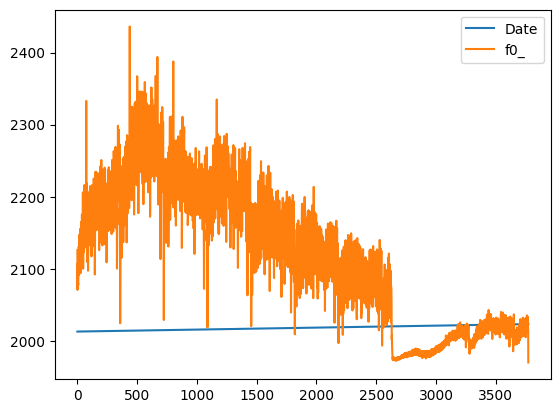

In [13]:
data.plot(kind='line')

In [14]:
data.index = data.Date

In [15]:
data = data.drop("Date",axis = 1)

<Axes: xlabel='Date'>

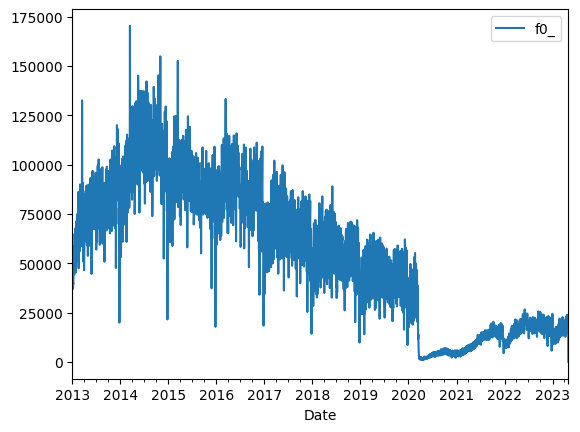

In [16]:
data.plot(kind='line')

In [17]:
data = data.reset_index()

In [18]:
yearly = pd.pivot_table(data,
                         values='Date',
                         index = pd.Grouper(freq = 'A',key='Date'),aggfunc='sum')

# freq = 'A' - Annual, 'M' - Monthly, 'Q' - Quarterly, 'D' - Daily
# aggfunc = "mean", "sum", "median", "sd"

In [19]:
yearly.head()

f0_
Date                
2013-12-31  27217029
2014-12-31  37394851
2015-12-31  32385354
2016-12-31  31756080
2017-12-31  24979023

<Axes: xlabel='Date'>

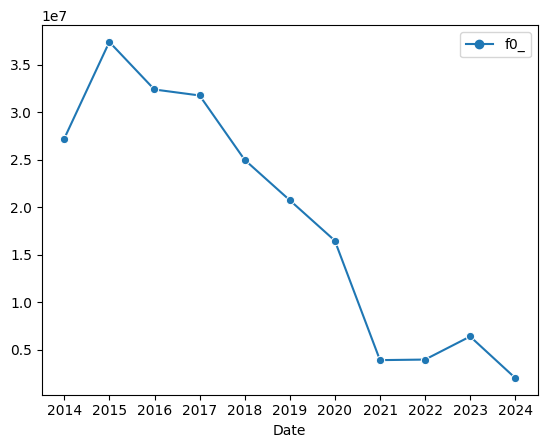

In [20]:
#yearly.plot(kind='line')

sns.lineplot(yearly,markers=True)

In [21]:
yearly = yearly.reset_index()

In [32]:
yearly

Date       f0_
0  2013-12-31  27217029
1  2014-12-31  37394851
2  2015-12-31  32385354
3  2016-12-31  31756080
4  2017-12-31  24979023
5  2018-12-31  20729811
6  2019-12-31  16474869
7  2020-12-31   3888499
8  2021-12-31   3947073
9  2022-12-31   6378538
10 2023-12-31   2014610

In [31]:
data.rename(columns = {'f0_':'Trips'}, inplace = True)

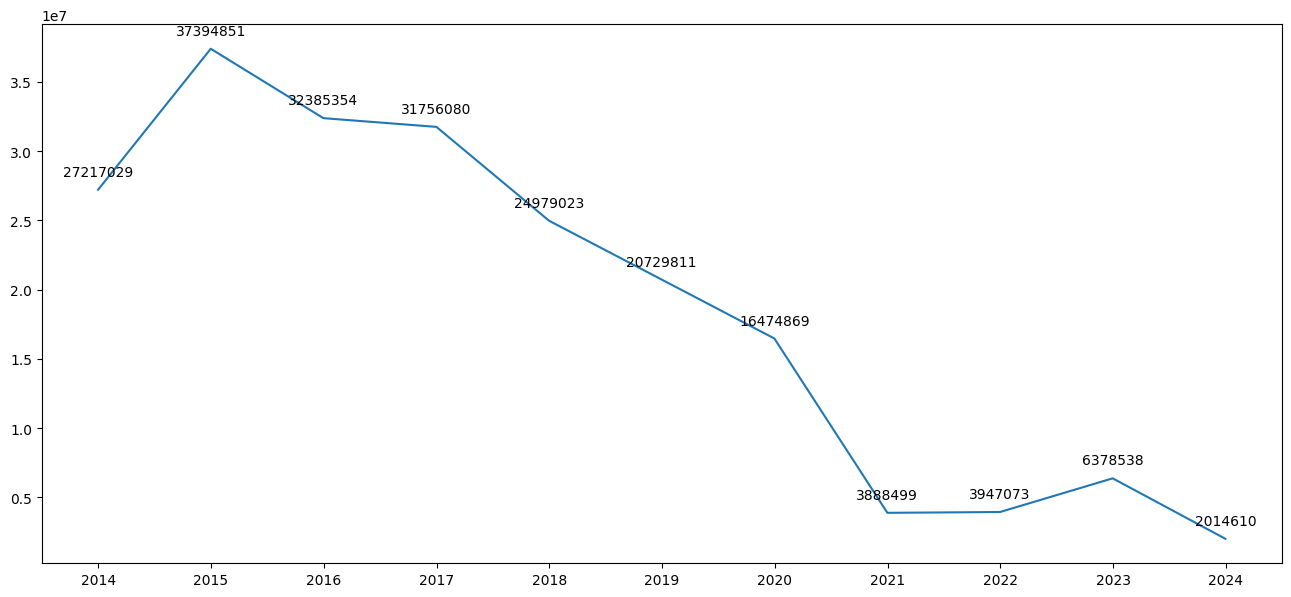

In [33]:
plt.figure(figsize=(16,7))
plt.plot(yearly.Date,yearly.f0_)

for x, y in zip(yearly.Date, yearly.f0_):
    label = y
    plt.annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center")

In [34]:
yearly_quarter = pd.pivot_table(data,
                         values='Date',
                         index = pd.Grouper(freq = 'Q',key='Date'),aggfunc='sum')

In [35]:
yearly_quarter

Trips
Date                
2013-03-31   5651487
2013-06-30   6764016
2013-09-30   7055671
2013-12-31   7745855
2014-03-31   8086517
2014-06-30  10029049
2014-09-30   9967480
2014-12-31   9311805
2015-03-31   8351312
2015-06-30   8737220
2015-09-30   7883913
2015-12-31   7412909
2016-03-31   7929870
2016-06-30   8555237
2016-09-30   7844952
2016-12-31   7426021
2017-03-31   6242762
2017-06-30   6840527
2017-09-30   6081334
2017-12-31   5814400
2018-03-31   5204888
2018-06-30   5757622
2018-09-30   4954459
2018-12-31   4812842
2019-03-31   4041602
2019-06-30   4481450
2019-09-30   3998424
2019-12-31   3953393
2020-03-31   2752604
2020-06-30    230091
2020-09-30    436312
2020-12-31    469492
2021-03-31    510974
2021-06-30    832522
2021-09-30   1232777
2021-12-31   1370800
2022-03-31   1190811
2022-06-30   1756302
2022-09-30   1769631
2022-12-31   1661794
2023-03-31   1445027
2023-06-30    569583

In [37]:
yearly_quarter = yearly_quarter.reset_index()

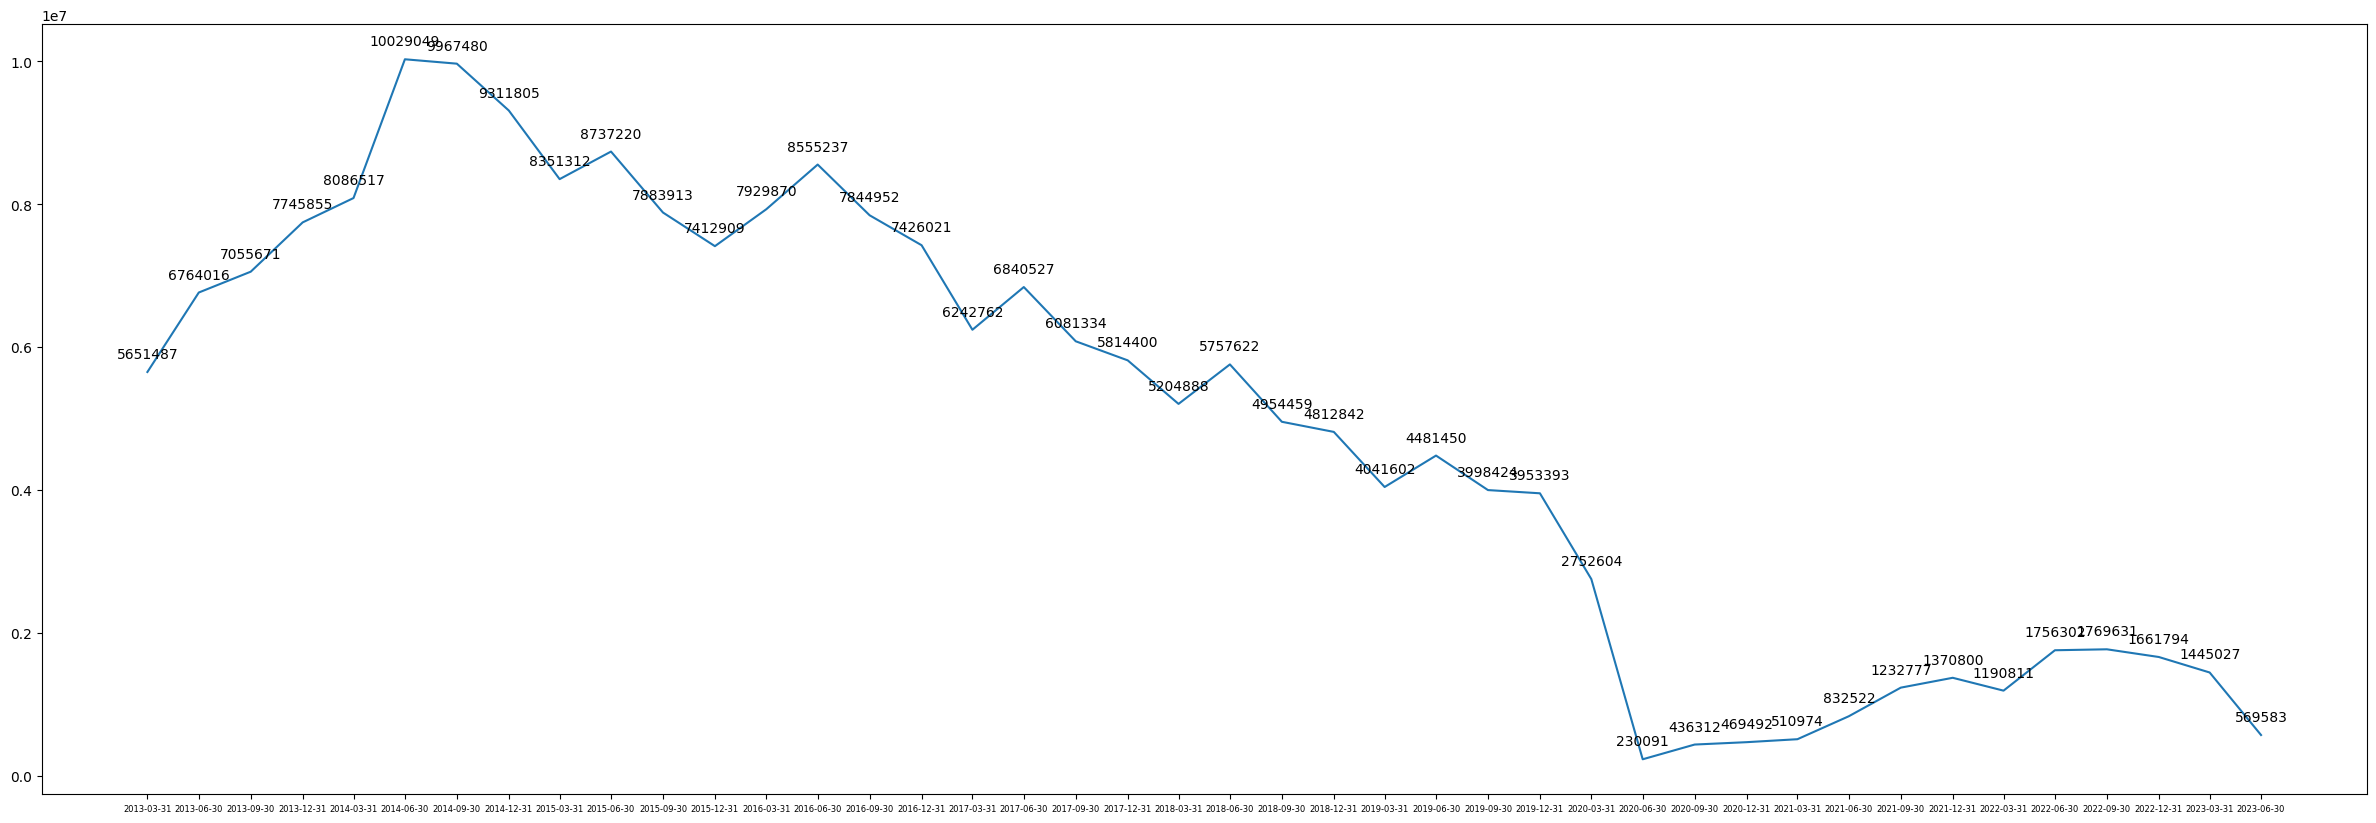

In [38]:
plt.figure(figsize=(30,10))
plt.plot(yearly_quarter.Date,yearly_quarter.Trips)

for x, y in zip(yearly_quarter.Date, yearly_quarter.Trips):
    label = y
    plt.annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center")
    plt.xticks(yearly_quarter.Date,fontsize = 6)

In [39]:
data

Date  Trips
0    2013-01-01  56953
1    2013-01-02  36830
2    2013-01-03  38808
3    2013-01-04  50391
4    2013-01-05  48352
...         ...    ...
3768 2023-04-27  23188
3769 2023-04-28  22088
3770 2023-04-29  16106
3771 2023-04-30  16228
3772 2023-05-01     44

[3773 rows x 2 columns]

In [40]:
data.index = data.Date

In [41]:
data = data.drop('Date',axis = 1)

<Axes: xlabel='Date'>

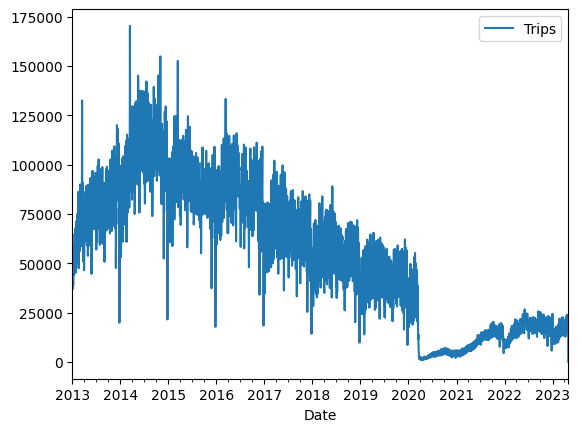

In [42]:
data.plot(kind = 'line')

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
adfuller(data)

(-0.8449318458264388,
 0.8055662136210648,
 30,
 3742,
 {'1%': -3.432098741718118,
  '5%': -2.8623126975788264,
  '10%': -2.5671813176558236},
 75811.60639161228)

In [45]:
from statsmodels.tsa.stattools import kpss

In [46]:
kpss(data)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(8.471009687129213,
 0.01,
 38,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
data_diff = data.diff()

In [ ]:
data_diff.head()

In [ ]:
data_diff = data_diff.dropna()

In [ ]:
data_diff.plot(kind='line')

In [ ]:
adfuller(data_diff)

In [ ]:
kpss(data_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
seasonal_decompose(data_diff).plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
plot_acf(data_diff)

In [ ]:
plot_pacf(data_diff)

In [47]:
from pmdarima.arima import auto_arima

In [52]:
arima_model = auto_arima(data,max_p=10,max_q=10 , stationary=False)

In [53]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3773
Model:               SARIMAX(6, 1, 6)   Log Likelihood              -38197.472
Date:                Thu, 15 Jun 2023   AIC                          76422.944
Time:                        12:45:12   BIC                          76510.239
Sample:                    01-01-2013   HQIC                         76453.981
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -32.8703     21.091     -1.558      0.119     -74.208       8.467
ar.L1          0.5379      0.028     19.147      0.000       0.483       0.593
ar.L2         -0.5393      0.045    -12.093      0.000      -0.627      -0.452
ar.L3         -0.1339      0.056     -2.376      0.017      -0.244      -0.023
ar.L4          0.2105      0.055      3.803      0.000       0.102       0.319
ar.L5         -0.8107      0.044    -18.360      0.000      -0.897      -0.724
ar.L6          0.6880      0.027     25.848      0.000       0.636       0.740
ma.L1         -0.7558      0.026    -28.574      0.000      -0.808      -0.704
ma.L2          0.4513      0.046      9.726      0.000       0.360       0.542
ma.L3          0.0087      0.056      0.155      0.877      -0.101       0.118
ma.L4         -0.3913      0.055     -7.166      0.000      -0.498      -0.284
ma.L5          0.7291      0.042     17.304      0.000       0.647       0.812
ma.L6         -0.8762      0.024    -36.267      0.000      -0.924      -0.829
sigma2      4.375e+07      0.000   2.14e+11      0.000    4.38e+07    4.38e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             20971.00
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+26. Standard errors may be unstable.
"""

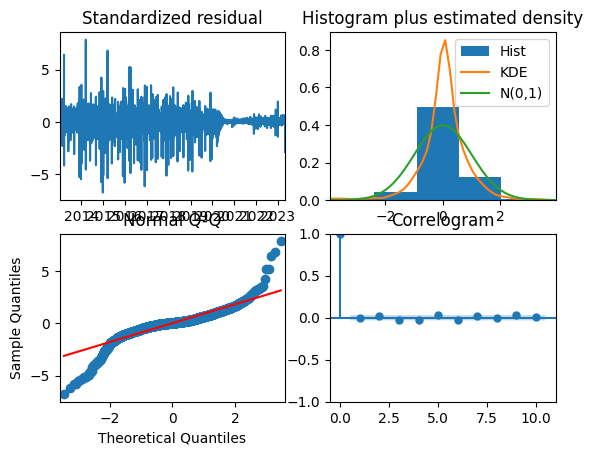

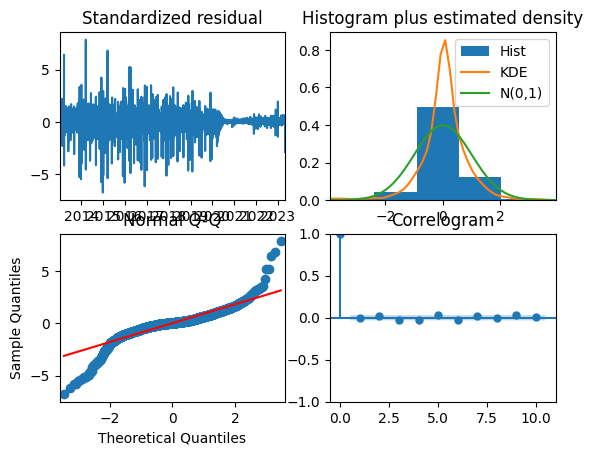

In [54]:
arima_model.plot_diagnostics()

In [55]:
taxipredict = pd.DataFrame(arima_model.predict(n_periods=120))

In [57]:
index_of_fc = pd.date_range(data.index[-1],periods=120,freq="M")

In [58]:
taxipredict = pd.DataFrame(taxipredict)

In [59]:
taxipredict.index = index_of_fc

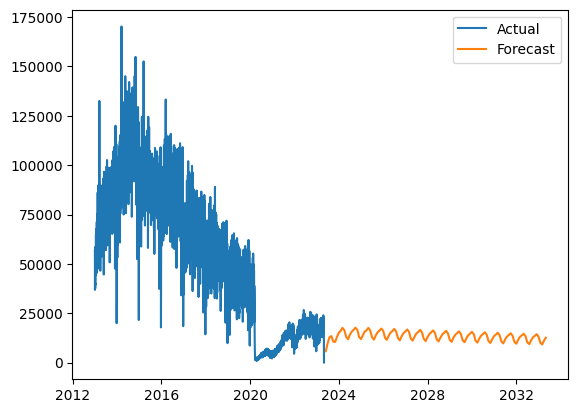

In [61]:
plt.plot(data,label="Actual")
plt.plot(taxipredict,label="Forecast")
plt.legend()
plt.show()

In [62]:
from prophet import Prophet

In [63]:
data = data.reset_index()

In [64]:
data.columns = ['ds','y']

In [65]:
m = Prophet()
m.fit(data)

12:46:18 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
future = m.make_future_dataframe(periods=24,freq='M')

In [67]:
forecast = m.predict(future)

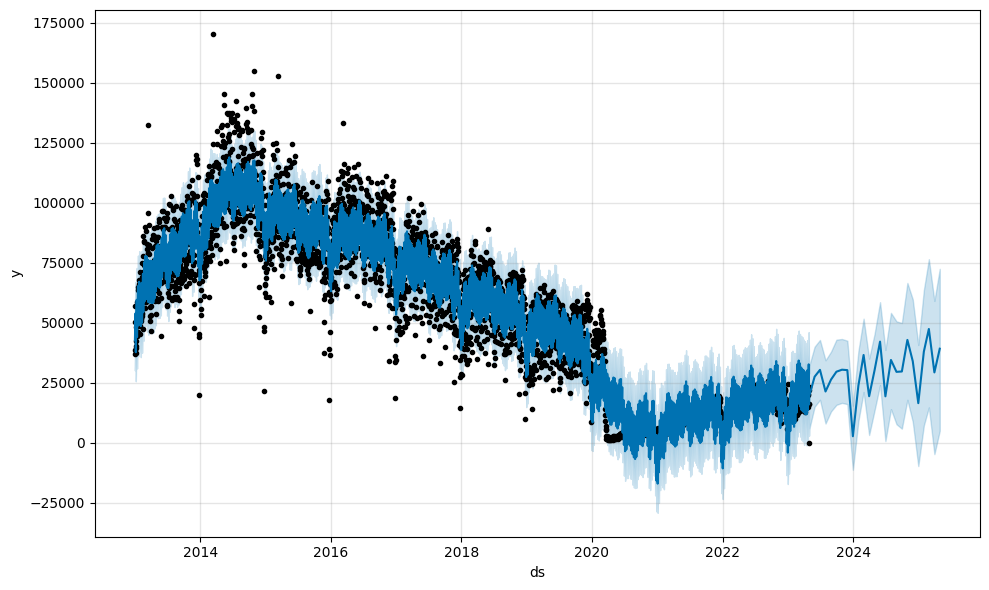

In [68]:
fig1 = m.plot(forecast)

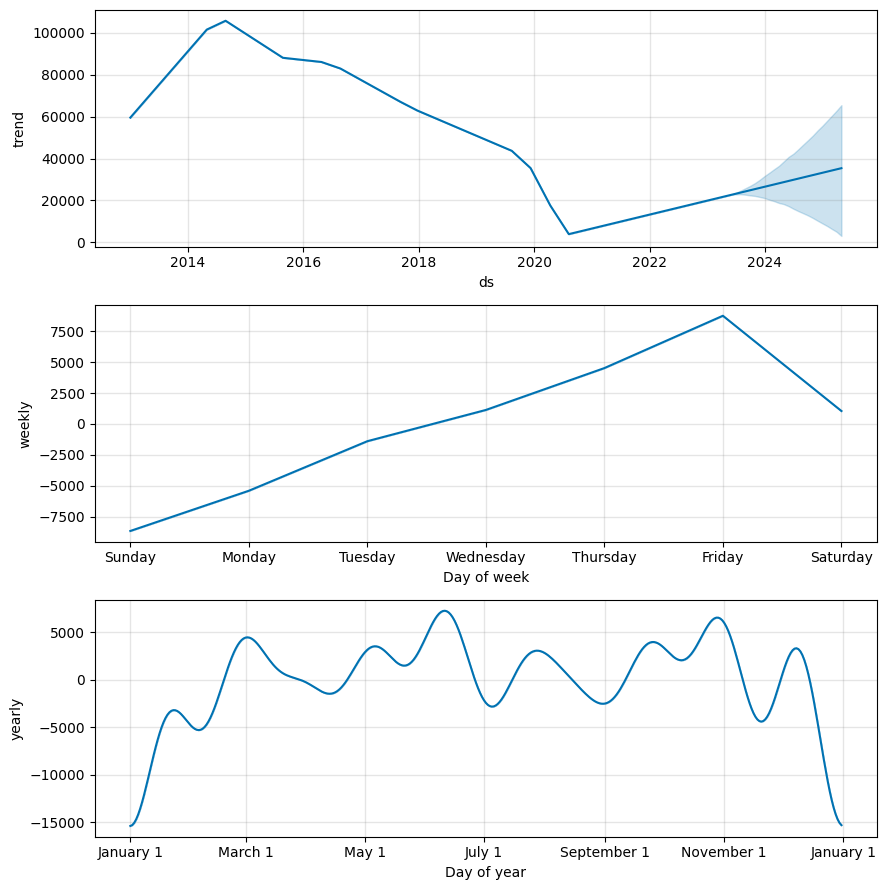

In [69]:
fig2 = m.plot_components(forecast)

In [70]:
from prophet.plot import plot_plotly, plot_components_plotly

In [71]:
plot_plotly(m,forecast)

In [72]:
plot_components_plotly(m,forecast)

C:\Users\Hp\anaconda3\lib\site-packages\plotly\io\_json.py:534: UserWarning:

Discarding nonzero nanoseconds in conversion.

